<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/n211_discussion_6%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N211 Linear Regression**

## 오늘의 목표
- 데이터를 모델링에 적합한 형태로 가공할 수 있습니다.
- 회귀 문제에서 기준 모델을 만들고 기준 모델의 성능을 평가할 수 있습니다.
- scikit-learn을 이용해 선형회귀 모델을 만들어 학습하고 해석할 수 있습니다.
- 기준 모델과 선형회귀 모델의 성능을 비교할 수 있습니다.

## **개념 Topic**

- 오늘은 선형회귀 모델에 대해 배웠습니다.
- 선형 회귀를 한 문장으로 요약하여 설명해보세요.
  - `scatterplot에 가장 잘 맞는(best fit) 직선을 그려주면 그것이 회귀 예측모델이 됩니다.`를 제외한 문장이어야 합니다.
  - `선형회귀모델이란 무엇이며 어떻게 최적의 모델을 구할 수 있나요?` 에 답할 수 있도록 정리해 보세요.
  - 어떤 키워드가 포함되어야할지 키워드 위주로 고민해보세요.
  - 만약 설명이 어렵다면 어느 부분이 이해가 안 되는지 구체적인 질문을 동기들과 나눠보세요.
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

- 선형 회귀는 독립 변수와 종속 변수 간의 선형적인 관계를 모델링하는 통계학적 기법입니다.

## **코딩 Topic**

### **Part.1 : 데이터 준비**

인도의 한 도시인 [Begaluru의 집값 데이터](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data)를 사용해서 집값을 예측하는 회귀 문제를 풀어보겠습니다.

데이터에 대한 더 자세한 설명은 위의 링크를 참고하세요.

> **Data Description**

- Area_type : Description of the area
- Availability : When it can be possessed or when it is ready
- Location : Where it is located in Bengaluru
- Size : BHK or Bedrooms
- Society : To which society it belongs
- Total_sqft : Size of the property in sq.ft
- Bath : No. of Bathrooms
- Balcony : No. of the Balcony
- Price : Value of the property in lakhs (Indian Rupee - ₹)


#### **1-1. 데이터셋 불러오기**
- 주어진 데이터를 불러오고 데이터의 shape을 확인해보세요.

In [ ]:
import pandas as pd
data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/renewal/mldl/House_Data.csv')
display(data.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### **1-2. 데이터 전처리**
데이터를 모델링에 적합한 형태로 가공합니다.
- 기존 데이터에서 ['total_sqft', 'bath', 'balcony', 'price'] column만 추출하여 **df** 변수에 데이터프레임 형태로 저장해 보세요.
    - 특성들의 타입을 확인해보세요.
    - 4가지 특성만 선택한 데이터에서 결측치, 중복값을 확인해보고 존재한다면 제거해주세요.
    - 전처리 후 데이터의 shape은 (10933,4)입니다.

In [ ]:
df = data[['total_sqft', 'bath', 'balcony', 'price']]
df

,total_sqft,bath,balcony,price
0,1056,2.0,1.0,39.07
1,2600,5.0,3.0,120.00
2,1440,2.0,3.0,62.00
3,1521,3.0,1.0,95.00
4,1200,2.0,1.0,51.00
...,...,...,...,...
13315,3453,4.0,0.0,231.00
13316,3600,5.0,NaN,400.00
13317,1141,2.0,1.0,60.00
13318,4689,4.0,1.0,488.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13320 non-null  object 
 1   bath        13247 non-null  float64
 2   balcony     12711 non-null  float64
 3   price       13320 non-null  float64
dtypes: float64(3), object(1)
memory usage: 416.4+ KB


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.shape

(10933, 4)

#### **1-3. total_sqft 타입변경**
집의 총 면적을 나타내는 `total_sqft` 특성은 수치형이어야 합니다. <br>
따라서, **object** 형식으로 되어있는 `total_sqft` 특성의 타입을 **float**으로 바꿔주기 위해 수치형으로 변환하기 애매한 데이터들을 제거해줍니다.

- 주어진 코드(for loop)를 실행하세요.
  - `total_sqft` 변수의 값들을 for loop을 통해 수치형으로 변환해 보고, 변환할 때 에러가 발생하는 값의 index를 `idx` 리스트에 저장하여 해당 샘플(row)을 제거해줍니다.
  - 수치형으로 변환시킬 때 왜 에러가 나는지 코드 실행 후 데이터를 확인해보세요.
- 샘플 제거 후 최종 데이터의 shape은 (10748, 4)이어야 합니다.
- `total_sqft`의 타입을 float으로 변환하세요.
- (optional) 이 방법 외에 데이터를 제거하지 않으면서 `total_sqft` 변수를 수치형으로 변환하는 다른 방법이 있다면 논의해보세요.

In [ ]:
# 수치로 변환되지 않는 데이터 index 추출
idx = []
for i in range(len(df.total_sqft)):
  try:
    float(df.total_sqft[i])
  except:
    idx.append(i) # 수치형으로 변환되지 않은 데이터들의 index 저장. ex) 2100 - 2850 형식처럼 수치형으로 바꿀 수 없는 데이터 존재.

In [ ]:
df.iloc[idx[:10]] # 이와 같이 수치형으로 바꾸기 애매한 데이터들 확인.

,total_sqft,bath,balcony,price
27,2100 - 2850,4.0,0.0,186.000
114,3067 - 8156,4.0,0.0,477.000
129,1042 - 1105,2.0,0.0,54.005
152,1145 - 1340,2.0,0.0,43.490
175,1015 - 1540,2.0,0.0,56.800
386,34.46Sq. Meter,1.0,0.0,18.500
515,1195 - 1440,2.0,0.0,63.770
618,1120 - 1145,2.0,0.0,48.130
628,3090 - 5002,4.0,0.0,445.000
724,1160 - 1195,2.0,0.0,59.935


In [ ]:
df = df.drop(idx).reset_index(drop=True)
df

,total_sqft,bath,balcony,price
0,1056,2.0,1.0,39.07
1,2600,5.0,3.0,120.00
2,1440,2.0,3.0,62.00
3,1521,3.0,1.0,95.00
4,1200,2.0,1.0,51.00
...,...,...,...,...
10743,1050,2.0,2.0,52.71
10744,1262,2.0,2.0,47.00
10745,3453,4.0,0.0,231.00
10746,1141,2.0,1.0,60.00


In [ ]:
df['total_sqft']  = df['total_sqft'].astype(float)

- ##- ## 의 형식은 두 숫자를 평균 낸 값으로 변환 가능
- 단위 다른거 sqft 단위로 통일 가능

- 그러나 분석상의 편의 + 전체데이터 크기에 비해 작은 이상값들 : 그냥 drop

### **Part.2 : 모델링**
타겟이 집값(수치)이기 때문에 회귀 문제에 해당하고, 여러 회귀 모델 중 이번 디스커션에서는 **선형 회귀 모델**을 사용합니다.

#### **2-1. 데이터 분리**
모델링을 위해 입력 특성과 타겟으로 데이터를 나눕니다.
- `price` column을 타겟 데이터로(y), 나머지 column을 특성 데이터로(X) 나눠보세요.
- 데이터가 잘 나누어졌는지 X,y의 결과와 shape을 확인해보세요.

In [ ]:
# 3개의 특성을 이용하여 다중선형회귀를 만들어보겠습니다.
features = ['total_sqft', 'bath','balcony']
target = 'price'

X = df[features]
y = df[target]

print(X.shape)
print(y.shape)

(10748, 3)
(10748,)


In [ ]:
# scikit-learn에서 Linear Rergression을 가져옵니다.
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings(action='ignore')

# 모델을 학습합니다.
multiple_ols = LinearRegression()
multiple_ols.fit(X, y)

LinearRegression()

In [ ]:
X.shape

(10748, 3)

In [ ]:
y.shape

(10748,)

In [ ]:
X

,total_sqft,bath,balcony
0,1056.0,2.0,1.0
1,2600.0,5.0,3.0
2,1440.0,2.0,3.0
3,1521.0,3.0,1.0
4,1200.0,2.0,1.0
...,...,...,...
10743,1050.0,2.0,2.0
10744,1262.0,2.0,2.0
10745,3453.0,4.0,0.0
10746,1141.0,2.0,1.0


#### **2-2. 기준모델 설정**
모델링 전 기준모델을 설정해서 앞으로 개발할 예측 모델의 성능이 기준모델의 성능보다 뛰어나야 한다는 기준점을 만들어야 합니다.
- 타겟인 `price`의 평균값을 이용해서 기준모델을 만들어보세요.
    - 기준모델의 평가지표는 MSE, MAE, R2 score로 사용해보세요.
      ```python
      from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
      ```
    - 기준모델의 MSE, MAE, R2 score는 어떻게 되나요?

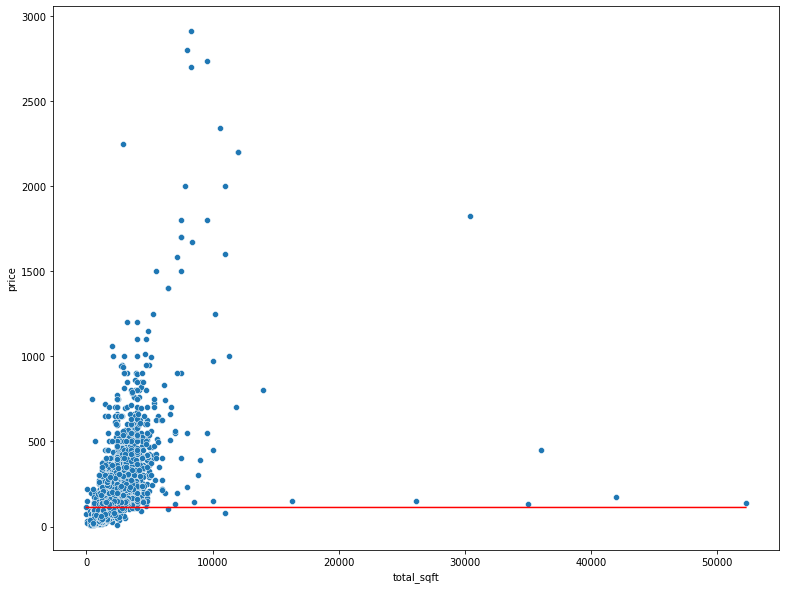

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# predict: 평균 기준모델
plt.figure(figsize=(13,10))
predict = df['price'].mean()
sns.lineplot(x=df['total_sqft'], y=predict, color='red')

sns.scatterplot(x=df['total_sqft'], y = df['price'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 실제값
y_real = df['price']

# 기준 모델
y_base = [predict]*len(df)

# 다중선형회귀
features = ['total_sqft', 'bath', 'balcony']
X_multiple = df[features]
y_multiple = multiple_ols.predict(X_multiple)

In [ ]:
# mse, rmse, mae, r2를 출력하는 함수입니다.

def eval_models(y_pred, y_real=y_real) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

In [ ]:
multiple_mse, multiple_rmse, multiple_mae, multiple_r2 = eval_models(y_multiple)
base_mse, base_rmse, base_mae, base_r2 = eval_models(y_base)

In [ ]:
eval_models(y_base)

(19770.21686583818, 140.60660320851997, 72.25376349365212, 0.0)

In [ ]:
comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base', 'Multiple'])
comparison_metrics['Base'] = [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Multiple'] = [multiple_mse, multiple_rmse, multiple_mae, multiple_r2]

comparison_metrics

,Base,Multiple
mse,19770.216866,12458.465888
rmse,140.606603,111.617498
mae,72.253763,45.833208
r2,0.000000,0.369837


#### **2-3. 선형회귀 모델링**
- 입력 특성과 타겟을 활용하여 선형회귀 모델을 만드세요.
- 선형회귀 모델의 MSE, MAE, R2 score는 어떻게 되나요?
  - 기준 모델보다 성능이 더 나아졌나요? 어떠한 것을 보고 나아졌는지, 나아지지 않았는지 판단할 수 있었나요?

In [ ]:
print('price = {0:.3f} + {1:.3f}*(total_sqft) + {2:.3f}*(bath) + {3:.3f}*(balcony)'
      .format(multiple_ols.intercept_,multiple_ols.coef_[0],multiple_ols.coef_[1],multiple_ols.coef_[2]))

price = -47.020 + 0.051*(total_sqft) + 30.667*(bath) + -1.107*(balcony)


In [ ]:
comparison_metrics

,Base,Multiple
mse,19770.216866,12458.465888
rmse,140.606603,111.617498
mae,72.253763,45.833208
r2,0.000000,0.369837


> MSE가 낮아짐 + r^2(설명력)이 증가함에 따라 기존모델 보다 성능이 나아짐

#### **2-4. 모델 해석**
- 회귀계수를 보고 모델의 결과를 해석해봅시다.
    - 어떤 특성이 중요해보이나요?
    - **집 면적(total_sqft)**이 커질수록 집값은 증가하나요? 감소하나요?
        - 회귀계수를 보고 해석해보세요.

In [ ]:
print('회귀식 : price = {0:.3f} + {1:.3f}*(total_sqft) + {2:.3f}*(bath) + {3:.3f}*(balcony) + E'
      .format(multiple_ols.intercept_,multiple_ols.coef_[0],multiple_ols.coef_[1],multiple_ols.coef_[2]))

회귀식 : price = -47.020 + 0.051*(total_sqft) + 30.667*(bath) + -1.107*(balcony) + E


In [ ]:
df['bath'].describe(), df['total_sqft'].describe()

(count    10748.000000
 mean         2.670822
 std          1.272837
 min          1.000000
 25%          2.000000
 50%          2.000000
 75%          3.000000
 max         40.000000
 Name: bath, dtype: float64, count    10748.000000
 mean      1551.862438
 std       1236.068747
 min          5.000000
 25%       1100.000000
 50%       1300.000000
 75%       1690.000000
 max      52272.000000
 Name: total_sqft, dtype: float64)

In [ ]:
test = comparison_metrics.reset_index().melt(id_vars='index')
test1 = test[test['index']=='mse']
test2 = test[test['index']!='mse']
test3 = test[test['index']=='r2']

<Axes: xlabel='index', ylabel='value'>

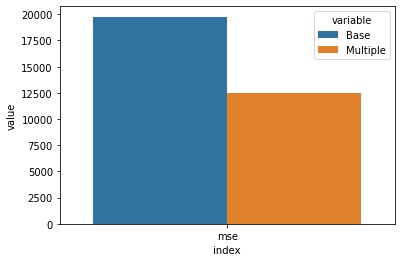

In [ ]:
sns.barplot(data=test1, x='index', y='value', hue='variable')

<Axes: xlabel='index', ylabel='value'>

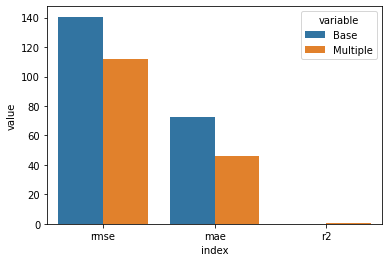

In [ ]:
sns.barplot(data=test2, x='index', y='value', hue='variable')

<Axes: xlabel='index', ylabel='value'>

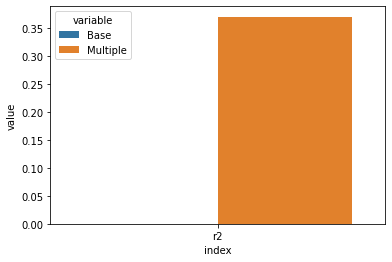

In [ ]:
sns.barplot(data=test3, x='index', y='value', hue='variable')


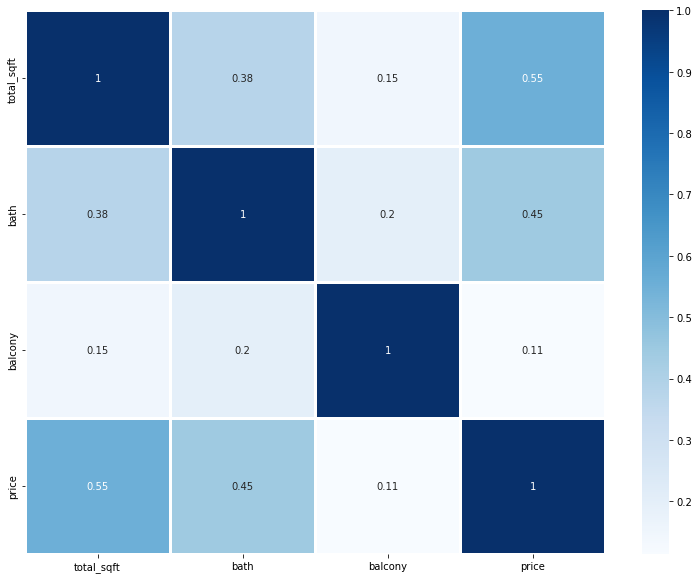

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "Blues", annot=True, linewidth=3);

### **Conclusion**
> 오늘 Topic을 수행한 결과를 바탕으로, 다음 사항에 대해 답해 주세요.

- 기준 모델의 성능(MAE, MSE, R2 score)은 어떻게 되나요?
- 입력 특성과 타겟에 각각 어떤 column을 사용했나요?
- 선형회귀 모델은 기준 모델보다 성능이 좋은 모델인가요?
- 회귀계수를 통해 모델을 해석해보았을 때 어떤 특성이 중요해보이나요?
  - 왜 그렇게 생각하시나요?
  - 해당 특성은 집값에 어떤 방향으로 영향을 주나요? (양의 방향: +, 음의 방항: -)
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

- 기준모델의 성능은 아주 아주 안좋음
- 입력 특성 : 'total_sqft', 'bath', 'balcony'  타겟 : 'price'
- 선형회귀가 기존 모델보다 성능 좋음
- coefficient의 크기가 bath 가 가장 높아 영향력이 가장 높아보이지만,,
- total_sqft 의 범위는 [5, 52272] , bath의 범위는 [1, 40] 으로 값의  scale이 달라서 실제 영향을 coefficient의 크기로만 판단하기는 어렵겟다
- total_sqft의 평균적인 값이 bath의 보다 1000배이상이므로 실질적으로 total_sqft의 영향력이 가장클듯 
- +

- total_sqft의 coefficient는 0.051 로 양수이므로 커질수록 price가 증가한다.
- balcony의 coefficient는 -1.107로 음수이므로 커질수록 price가 감소한다. 
- 기업용 사무실 같은 곳은 비싸지만, 발코니가 없을수도 ?

- balcony와 price 사이의 corr 값이 0.11 으로 매우 낮음 > 종속-독립 변수간 선형성이 떨어져서 의미있는 종속변수가 안된듯?
  

## **심화 Topic (optional)**
> 추가적으로 다음 사항들에 대해서 이야기해 보세요. 

- 지도학습의 프로세스를 설명해 보세요. 
  - 다음 다이어그램을 **Data**, **Model**, **Training**, **Evaluation**, **Inference**의 개념을 포함시켜서 설명해 보세요.
    - 다이어그램 <br>
      <img src = 'https://imgur.com/bBGwYN7.png' width=500>
- 주변에서 찾아볼 수 있는 회귀 문제는 무엇이 있을까요? 여러분이 실제로 프로젝트를 한다고 생각하고 관심 도메인에서 구체적으로 어떤 예시가 있을지 생각해보세요.
  - 여러분들은 어떤 프로젝트가 하고 싶으세요? 서로 아이디어를 나눠보세요.
- 디즈니플러스에서 시청률 추세를 예측하는 회귀모델을 만들었습니다. 전체 시간대 중 95% 시간대에서 모델의 예측오차는 1% 밖에 되지 않는 반면 RMSE가 너무 높습니다. 예측오차를 보면 좋은 모델인데 RMSE가 너무 높은 이유는 뭘까요?
  - RMSE의 특징이 무엇인가요? 특징을 생각하면서 위의 문제를 풀어보세요.